# Grid World

## Goal

In this part we are going to use **dynamic programming** in order to solve a grid world environment. In this assignment you have to implement by yourself **value iteration** and **policy iteration** in a OpenAI Gym environment: the [FrozenLake](https://gym.openai.com/envs/FrozenLake-v0/).

It is described as it:
> The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.

If you have some difficulties to use OpenAI Gym, please refer to the [week1 notebook]().

We ask you first to implement the algorithms and then dig a bit into the mathematical part. We will guide you through the theory in order you to be able to understand what you are doing. We provide some resources at the end of the notebook so as to help you during the process. Feel free to do your own research. Cross-referencing sources and reading code will help you to better understand the subject.

In [1]:
import gym
import time
import pprint
import numpy as np
import week2_utils
import matplotlib.pyplot as plt

## Introduction

Value iteration and policy iteration are both based on **Bellman equation**. We saw in the [previous chapter]() that thanks to this equation and dynamic programming we are able to solve **Markov Decision Process** (MDP). These two technics are quite close: we aim to **calculate the optimal value**.

In the next cell we provide you `pp` in order to pretty print dictionnaries, arrays and so on. We start the environment `FrozenLake-v0`.

In [2]:
# You can use pp.pprint() to pretty print anything for debug
pp = pprint.PrettyPrinter(indent=2)
# Load the environment
env = gym.make('FrozenLake-v0')

We can visualize what it looks:

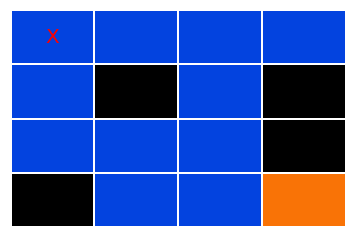

In [3]:
# You can also use env.render()
week2_utils.env2img(env, 'start_pos')

## Value iteration

In value iteration you compute the optimal value for all states and then you find the optimal policy associated to it. Think about it two seconds. Ok?

As we are using OpenAI Gym environment (`env`), there are some useful functions we are going to use:
- `env.env.P`: represents the transition probabilities of the environment.
- `env.env.P[s][a]`: is a list of transition tuples (prob, next_state, reward, done).
- `env.env.nS`: is a number of states in the environment.
- `env.env.nA`: is a number of actions in the environment.

Do not hesitate to print those values in order to understand them.

Good to know:
```
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3
```

Value iteration assigne la valeur d'une action à un state en regardant le reward d'une action sur l'état suivant. On prend le max des **actions**.

In [4]:
def get_expected_values(env, s, V, discount_factor):
    A = np.zeros(env.env.nA)
    for a in range(env.env.nA):
        A[a] = np.sum(prob * (reward + discount_factor * V[next_state]) for prob, next_state, reward, _ in env.env.P[s][a])
    return A

def value_iteration(env, theta=1e-20, discount_factor=0.99):
    V = np.zeros(env.env.nS)
    while True:
        delta = 0
        for s in range(env.env.nS):
            temp = V.copy()
            V[s] = np.max(get_expected_values(env, s, V, discount_factor))
            delta = max(delta, np.abs(temp[s] - V[s]))
        if delta < theta:
            print(f"Value function converged.")
            break
    return V

Value function converged.


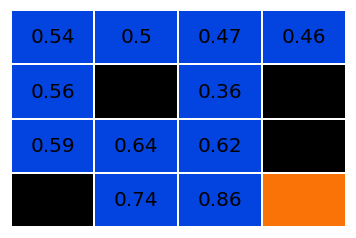

In [5]:
V = value_iteration(env)
week2_utils.plotV(V, env)

In [6]:
def get_policy_from_values(V, discount_factor=0.99):
    pi = np.zeros(env.env.nS)
    for s in range(env.env.nS):
        pi[s] = np.argmax(get_expected_values(env, s, V, discount_factor))
    return pi

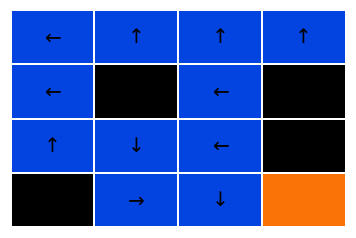

In [7]:
pi = get_policy_from_values(V)
week2_utils.plotPath(pi, env)

## Policy iteration

Policy iteration requires two steps: policy evaluation and policy improvement.

In policy evaluation we iterate over all states, we compute Bellman equation and keep the max value 

In [8]:
def policy_evaluation(env, pi, V, theta, discount_factor):
    while True:
        delta = 0
        for s in range(env.env.nS):
            temp = V.copy()
            V[s] = np.sum(prob * (reward + discount_factor * V[next_state]) for prob, next_state, reward, _ in env.env.P[s][pi[s]])
            delta = max(delta, np.abs(temp[s] - V[s]))
        if delta < theta:
            break
    return V
        
def policy_iteration(env, theta=1e-20, discount_factor=0.99):
    pi = np.zeros(env.env.nS, dtype=np.int)
    V = np.zeros(env.env.nS)
    policy_stable = True
    while True:
        old_pi = pi.copy()
        # Evaluate wrt to the policy
        V = policy_evaluation(env, pi, V, theta, discount_factor)
        pi = np.array([np.argmax(get_expected_values(env, s, V, discount_factor)) for s in range(env.env.nS)])
        if np.array_equal(old_pi, pi):
            return pi, V

In [9]:
pi2, V2 = policy_iteration(env)

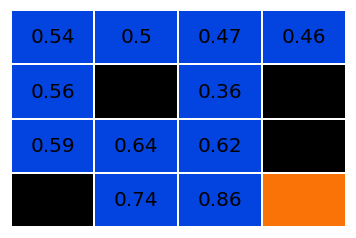

In [10]:
week2_utils.plotV(V2, env)

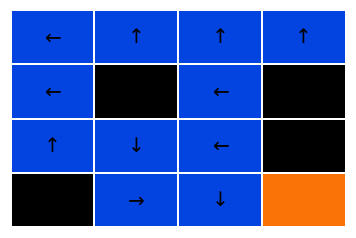

In [11]:
week2_utils.plotPath(pi2, env)

## Conclusion

Value iteration can be seen as a specific policy iteration.


- When to use Value-iteration and Policy-iteration?
- Real life examples

## Resources

- [Quora: How is policy iteration different from value iteration?](https://www.quora.com/How-is-policy-iteration-different-from-value-iteration)
- [Stackoverflow: What is the difference between value iteration and policy iteration?](https://stackoverflow.com/questions/37370015/what-is-the-difference-between-value-iteration-and-policy-iteration)
- [UC Berkeley CS188 Intro to AI - MDP II - slides](http://ai.berkeley.edu/slides/Lecture%209%20--%20MDPs%20II/SP14%20CS188%20Lecture%209%20--%20MDPs%20II.pptx)